# Introduction

In this notebook, we anayzle our national dataset.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import glob
%matplotlib inline
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import mplcursors
import warnings

# Filter out Altair FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module='altair')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# pip install mplcursors

## Load Data

In [3]:
#Load national data from SSA
national_df = pd.read_csv("Data/national_data.csv")
#Load state data from SSA
states_df = pd.read_csv("Data/states_data.csv")

### Births Per Year

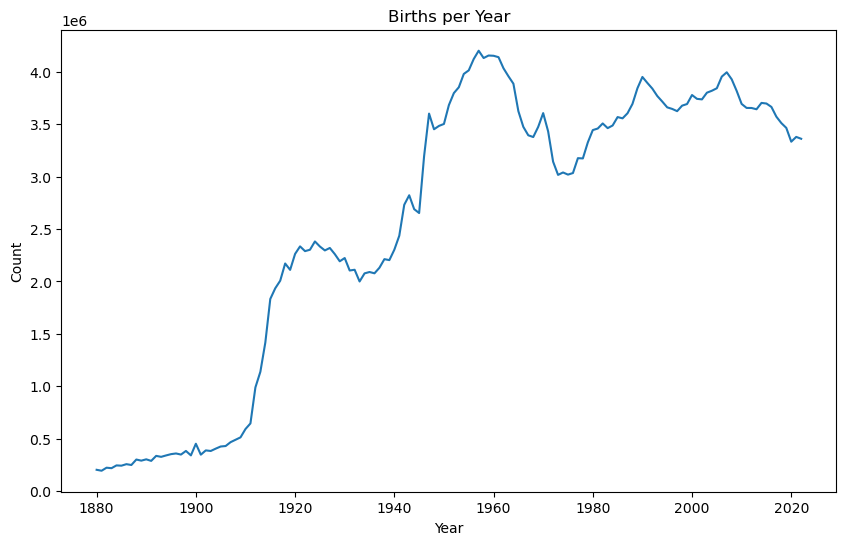

In [4]:
#Group data by year - calculate sum of counts
grouped_df1 = national_df.groupby('year')['count'].sum().reset_index()

#Create line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_df1, x='year', y='count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Births per Year')
plt.show()

### Name diversity over time

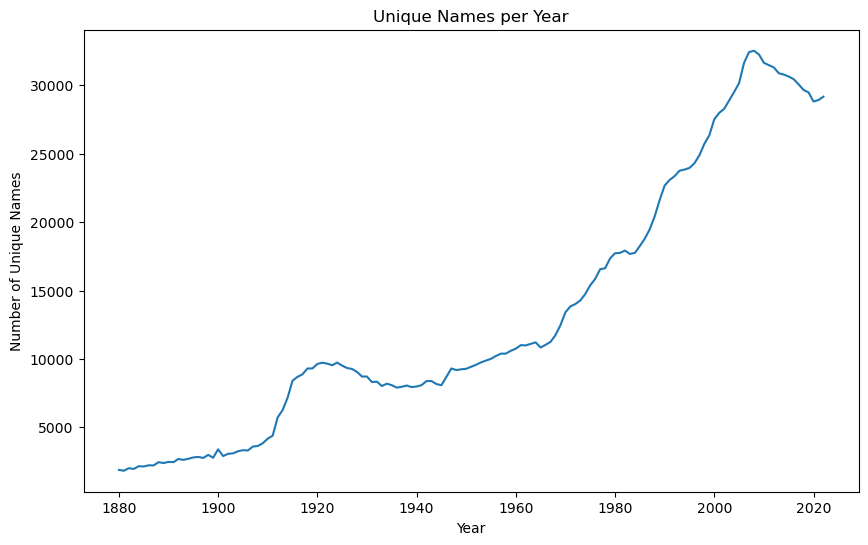

In [5]:
#Group data by year - coutn number of unique names 
grouped_df2 = national_df.groupby('year')['name'].nunique().reset_index()

#Create line plot
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_df2, x='year', y='name')
plt.xlabel('Year')
plt.ylabel('Number of Unique Names')
plt.title('Unique Names per Year')
plt.show()

### Name Count / Birth Count Ratio Over Time

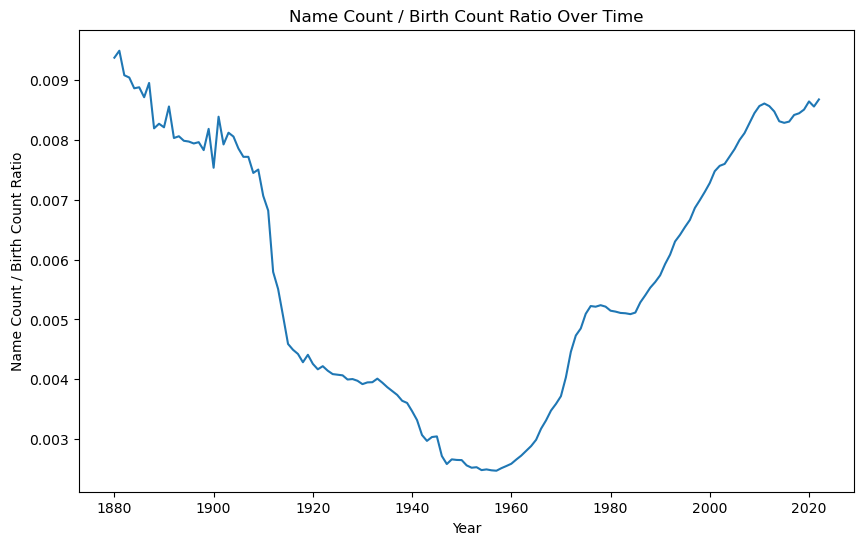

In [6]:
# Merge DataFrames on 'year'
merged_df = pd.merge(grouped_df1, grouped_df2, on='year')

# Calculate the name count to birth count ratio
merged_df['name_count_to_birth_ratio'] = merged_df['name'] / merged_df['count']

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='year', y='name_count_to_birth_ratio')
plt.xlabel('Year')
plt.ylabel('Name Count / Birth Count Ratio')
plt.title('Name Count / Birth Count Ratio Over Time')
plt.show()

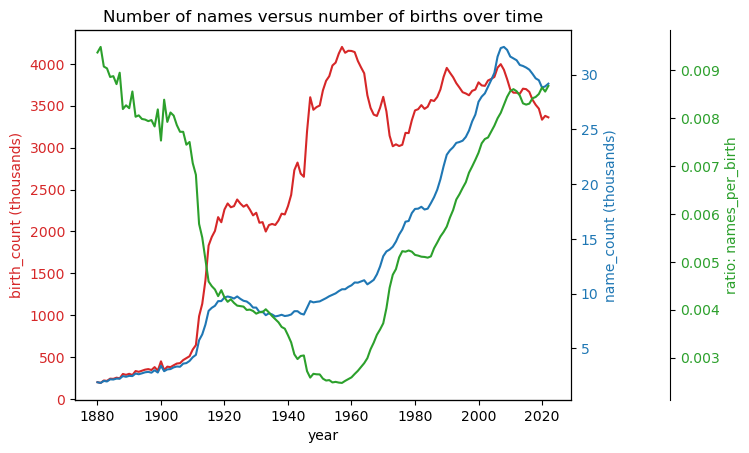

In [7]:
# combine all 3
merged_df.columns = ['year', 'birth_count', 'name_count', 'names_per_birth']
merged_df['birth_count_thou'] = merged_df['birth_count']/1000
merged_df['name_count_thou'] = merged_df['name_count']/1000

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('birth_count (thousands)', color=color)
ax1.plot(merged_df['year'], merged_df['birth_count_thou'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.xaxis.get_major_locator().set_params(integer=True)
ax1.ticklabel_format(useOffset=False, style='plain')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('name_count (thousands)', color=color)
ax2.plot(merged_df['year'], merged_df['name_count_thou'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))  
color = 'tab:green'
ax3.set_ylabel('ratio: names_per_birth', color=color)
ax3.plot(merged_df['year'], merged_df['names_per_birth'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

plt.title('Number of names versus number of births over time')
plt.show()

In [10]:
merged_df.head()

,year,birth_count,name_count,names_per_birth,birth_count_thou,name_count_thou
0,1880,201484,1889,0.009375,201.484,1.889
1,1881,192690,1829,0.009492,192.690,1.829
2,1882,221533,2012,0.009082,221.533,2.012
3,1883,216945,1962,0.009044,216.945,1.962
4,1884,243461,2158,0.008864,243.461,2.158


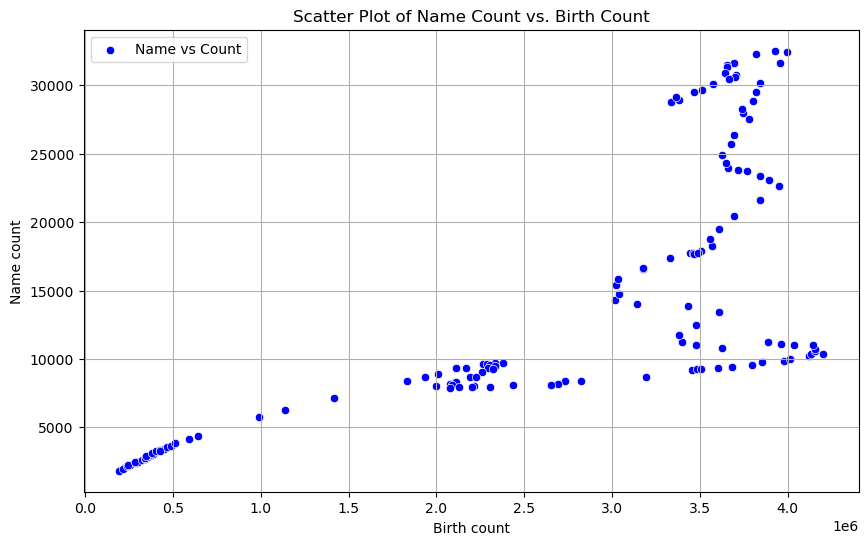

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = merged_df, x='birth_count', y='name_count', color='blue', marker='o', label='Name vs Count')
plt.xlabel('Birth count')
plt.ylabel('Name count')
plt.title('Scatter Plot of Name Count vs. Birth Count')
plt.legend()
plt.grid(True)

plt.show()

## Calculating the Difference from Previous Year (Velocity) and Acceleration
If there is a gap in years, which occurs for unusual names, just show the diff from two years ago.

In [12]:
#Sort values
national_df = national_df.sort_values(['sex','name','year'])

#Calculate Velocity
national_df['diff'] = national_df.groupby(['sex','name'])['count'].diff()
national_df.head(12)

,name,sex,count,year,diff
1705823,Aabha,F,7,2011,NaN
1743272,Aabha,F,5,2012,-2.0
1804465,Aabha,F,9,2014,4.0
1839808,Aabha,F,7,2015,-2.0
1872845,Aabha,F,7,2016,0.0
1971703,Aabha,F,6,2019,-1.0
2005105,Aabha,F,5,2020,-1.0
2036774,Aabha,F,5,2021,0.0
2068457,Aabha,F,5,2022,0.0
1941370,Aabidah,F,5,2018,NaN


In [13]:
# Calculate acceleration
national_df['accel'] = national_df.groupby(['sex','name'])['diff'].diff()
national_df.head(12)

,name,sex,count,year,diff,accel
1705823,Aabha,F,7,2011,NaN,NaN
1743272,Aabha,F,5,2012,-2.0,NaN
1804465,Aabha,F,9,2014,4.0,6.0
1839808,Aabha,F,7,2015,-2.0,-6.0
1872845,Aabha,F,7,2016,0.0,2.0
1971703,Aabha,F,6,2019,-1.0,-1.0
2005105,Aabha,F,5,2020,-1.0,0.0
2036774,Aabha,F,5,2021,0.0,1.0
2068457,Aabha,F,5,2022,0.0,0.0
1941370,Aabidah,F,5,2018,NaN,NaN


## Calculate 2-year changes
A jump that occurs between January and December will be more noticeable than a jump that occurs between July and June. They are both 12 months but the second jump will be spread over two rows. This will smooth out short term flucations in trends.

In [14]:
# Calculating the two year difference 
national_df['diff_2_years'] = national_df.groupby(['sex','name'])['count'].diff(periods=2)

national_df.head(12)

,name,sex,count,year,diff,accel,diff_2_years
1705823,Aabha,F,7,2011,NaN,NaN,NaN
1743272,Aabha,F,5,2012,-2.0,NaN,NaN
1804465,Aabha,F,9,2014,4.0,6.0,2.0
1839808,Aabha,F,7,2015,-2.0,-6.0,2.0
1872845,Aabha,F,7,2016,0.0,2.0,-2.0
1971703,Aabha,F,6,2019,-1.0,-1.0,-1.0
2005105,Aabha,F,5,2020,-1.0,0.0,-2.0
2036774,Aabha,F,5,2021,0.0,1.0,-1.0
2068457,Aabha,F,5,2022,0.0,0.0,0.0
1941370,Aabidah,F,5,2018,NaN,NaN,NaN


## Add Percentage of Birth Records

In [15]:
#Calculate the totala counts per year
national_df['count_all'] = national_df.groupby('year')['count'].transform('sum')

#Calculate the percentage 
national_df['perc'] = 100 * national_df['count'] / national_df['count_all']

#Display dataframe 
national_df.head()

,name,sex,count,year,diff,accel,diff_2_years,count_all,perc
1705823,Aabha,F,7,2011,NaN,NaN,NaN,3656309,0.000191
1743272,Aabha,F,5,2012,-2.0,NaN,NaN,3655713,0.000137
1804465,Aabha,F,9,2014,4.0,6.0,2.0,3704186,0.000243
1839808,Aabha,F,7,2015,-2.0,-6.0,2.0,3698388,0.000189
1872845,Aabha,F,7,2016,0.0,2.0,-2.0,3665860,0.000191


## Calculate differences versus std
We want to look at any significant jumps or drops in the count of names over time against historical averages. We are looking at instances where the count of a name in the next year deviates significantly from the 10-year rolling average. This is measured in standard deviations. 

In [16]:
#Sort dataframe 
std_df = national_df.sort_values(by=['name', 'sex', 'year'])

# Calculate 10-year rolling average and standard deviation
std_df['10yr_ave'] = std_df.groupby(['name', 'sex'])['count'].transform(lambda x: x.rolling(window=10, min_periods=10).mean().shift(1))
std_df['10yr_std'] = std_df.groupby(['name', 'sex'])['count'].transform(lambda x: x.rolling(window=10, min_periods=10).std().shift(1))

# Calculate the difference from the 10-year average
std_df['diff_from_10yr_ave'] = std_df['count'] - std_df['10yr_ave']

# Calculate the z-score
std_df['10yr_z_score'] = std_df['diff_from_10yr_ave'] / std_df['10yr_std']

n_std_dev = 2

# Identify jumps or drops
std_df['jump_or_drop'] = std_df['10yr_z_score'].apply(lambda x: 'jump' if x > n_std_dev else ('drop' if x < -n_std_dev else None))

#Display dataframe 
std_df.head(20)

,name,sex,count,year,diff,accel,diff_2_years,count_all,perc,10yr_ave,10yr_std,diff_from_10yr_ave,10yr_z_score,jump_or_drop
1586536,Aaban,M,5,2007,NaN,NaN,NaN,3996648,0.000125,NaN,NaN,NaN,NaN,None
1654844,Aaban,M,6,2009,1.0,NaN,NaN,3818823,0.000157,NaN,NaN,NaN,NaN,None
1686355,Aaban,M,9,2010,3.0,2.0,4.0,3694428,0.000244,NaN,NaN,NaN,NaN,None
1719069,Aaban,M,11,2011,2.0,-1.0,5.0,3656309,0.000301,NaN,NaN,NaN,NaN,None
1752989,Aaban,M,11,2012,0.0,-2.0,2.0,3655713,0.000301,NaN,NaN,NaN,NaN,None
1785378,Aaban,M,14,2013,3.0,3.0,3.0,3643652,0.000384,NaN,NaN,NaN,NaN,None
1818221,Aaban,M,16,2014,2.0,-1.0,5.0,3704186,0.000432,NaN,NaN,NaN,NaN,None
1851667,Aaban,M,15,2015,-1.0,-3.0,1.0,3698388,0.000406,NaN,NaN,NaN,NaN,None
1886981,Aaban,M,9,2016,-6.0,-5.0,-7.0,3665860,0.000246,NaN,NaN,NaN,NaN,None
1918552,Aaban,M,11,2017,2.0,8.0,-4.0,3572758,0.000308,NaN,NaN,NaN,NaN,None


## Plot some names that have had big drops and big jumps

### z-score drops

In [17]:
#Look at z-score drops
zdrop_df = std_df.sort_values(by=['10yr_z_score']).head(2)
zdrop_df['type']='z-score drop'

#Display dataframe
zdrop_df

,name,sex,count,year,diff,accel,diff_2_years,count_all,perc,10yr_ave,10yr_std,diff_from_10yr_ave,10yr_z_score,jump_or_drop,type
1539941,Damon,M,782,2006,-225.0,-240.0,-210.0,3955317,0.019771,1018.8,22.074621,-236.8,-10.727251,drop,z-score drop
1178135,Shauntel,F,13,1994,-15.0,-11.0,-19.0,3717356,0.000350,33.7,2.496664,-20.7,-8.291062,drop,z-score drop


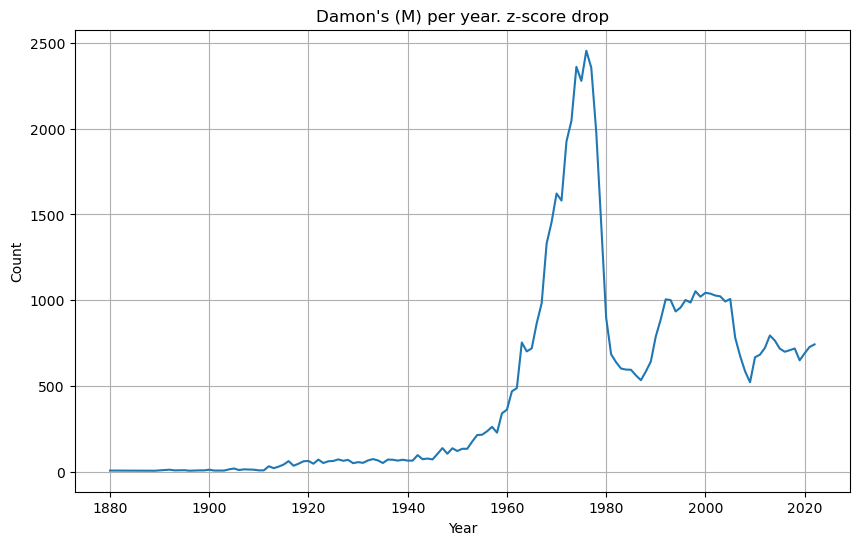

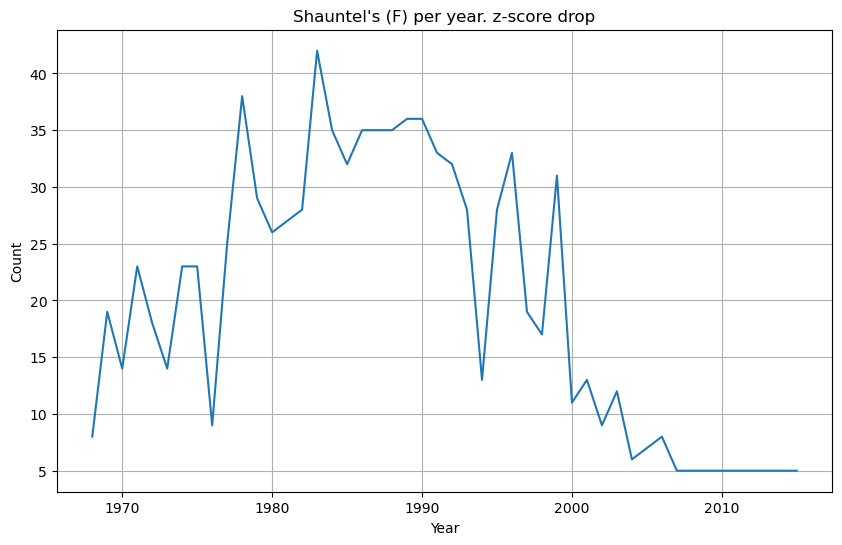

In [18]:
for ind, row in zdrop_df.iterrows():
    name = row['name']
    sex = row['sex']
    typ = row['type']
    
    # Filter data for the specific name and sex
    filtered_data = national_df[(national_df['name'] == name) & (national_df['sex'] == sex)]
    
    # Plot line chart
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['year'], filtered_data['count'])
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f"{name}'s ({sex}) per year. {typ}")
    plt.grid(True)
    plt.show()

### z-score jumps

In [19]:
#Look at z-score jumps
zjump_df = std_df.copy()
zjump_df.replace([np.inf, -np.inf], np.nan, inplace=True)
zjump_df = zjump_df[~pd.isnull(zjump_df['10yr_z_score'])].sort_values(by=['10yr_z_score']).tail(2)
zjump_df['type']='z-score jump'

#Display dataframe
zjump_df

,name,sex,count,year,diff,accel,diff_2_years,count_all,perc,10yr_ave,10yr_std,diff_from_10yr_ave,10yr_z_score,jump_or_drop,type
1171317,Aaliyah,F,1451,1994,1429.0,1432.0,1426.0,3717356,0.039033,16.8,4.732864,1434.2,303.030058,jump,z-score jump
809128,Kizzie,F,286,1977,281.0,281.0,281.0,3176703,0.009003,5.7,0.823273,280.3,340.470458,jump,z-score jump


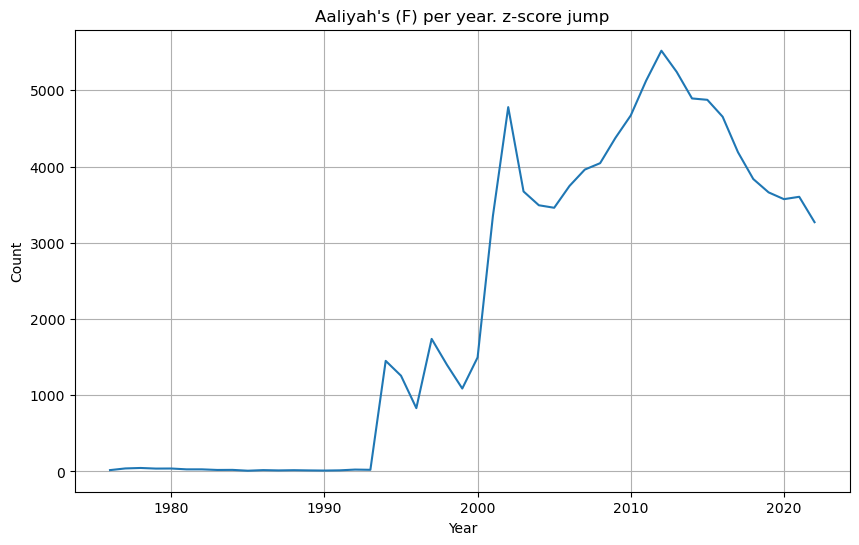

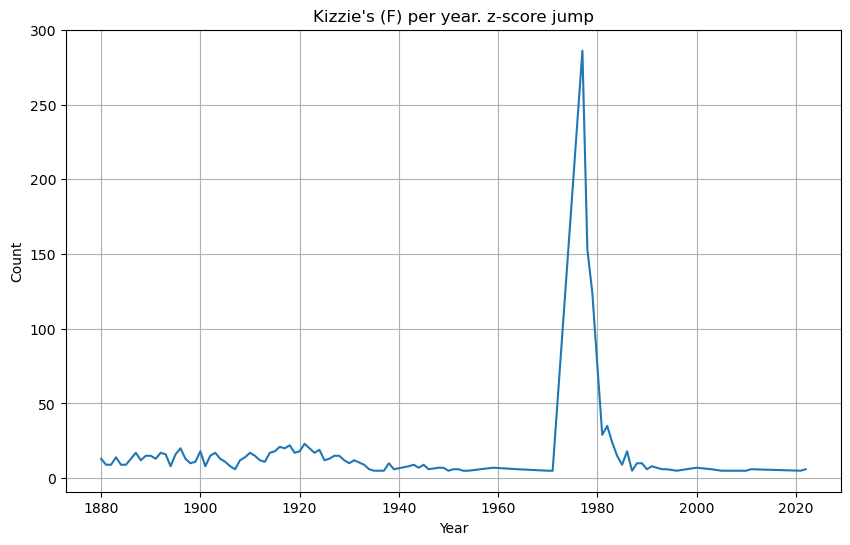

In [20]:
for ind, row in zjump_df.iterrows():
    name = row['name']
    sex = row['sex']
    typ = row['type']
    
    # Filter data for the specific name and sex
    filtered_data = national_df[(national_df['name'] == name) & (national_df['sex'] == sex)]
    
    # Plot line chart
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['year'], filtered_data['count'])
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f"{name}'s ({sex}) per year. {typ}")
    plt.grid(True)
    plt.show()

### Overall drops

In [21]:
#Look at overall drops
drop_df = std_df.sort_values(by=['diff']).head(2)
drop_df['type']='overall drop'

#Display dataframe
drop_df

,name,sex,count,year,diff,accel,diff_2_years,count_all,perc,10yr_ave,10yr_std,diff_from_10yr_ave,10yr_z_score,jump_or_drop,type
641066,John,M,71519,1965,-11004.0,-14905.0,-7103.0,3625625,1.972598,78798.9,2157.577317,-7279.9,-3.374109,drop,overall drop
461945,Linda,F,80431,1950,-10586.0,-5388.0,-15784.0,3503404,2.295796,53165.3,30848.704327,27265.7,0.883852,None,overall drop


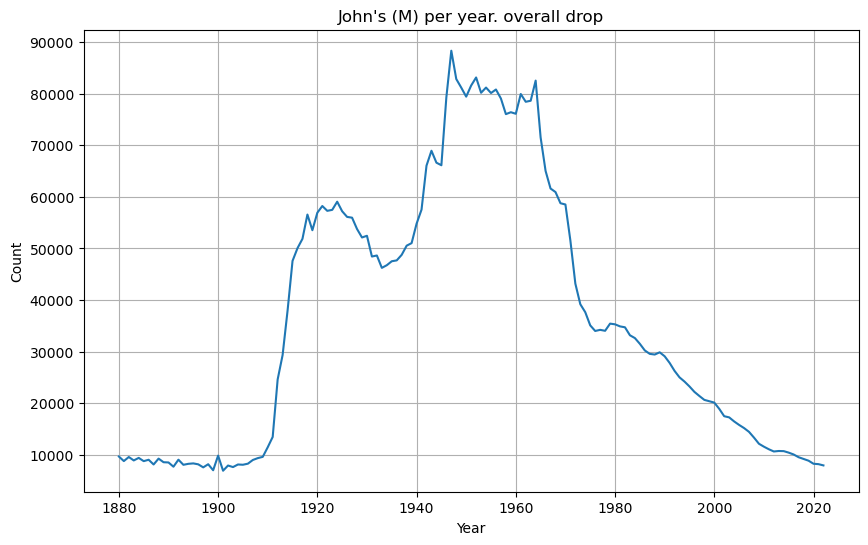

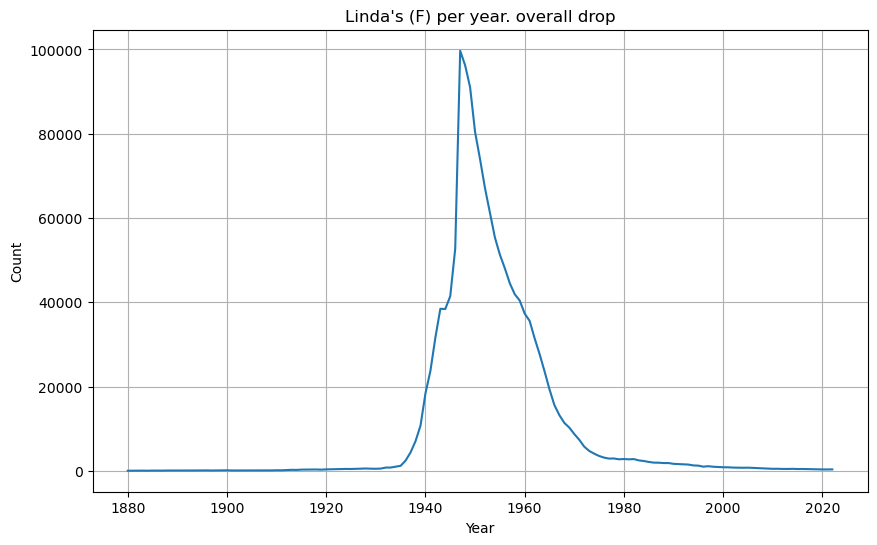

In [22]:
for ind, row in drop_df.iterrows():
    name = row['name']
    sex = row['sex']
    typ = row['type']
    
    # Filter data for the specific name and sex
    filtered_data = national_df[(national_df['name'] == name) & (national_df['sex'] == sex)]
    
    # Plot line chart
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['year'], filtered_data['count'])
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f"{name}'s ({sex}) per year. {typ}")
    plt.grid(True)
    plt.show()

### Overall jumps

In [23]:
#Look at overall jumps
jump_df = std_df[~pd.isnull(national_df['diff'])].sort_values(by=['diff']).tail(2)
jump_df['type']='overall jump'

#Display dataframe
jump_df

/var/folders/lb/1f9q5kds7h5c90s9vmqdd9qm0000gn/T/ipykernel_1591/878278813.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jump_df = std_df[~pd.isnull(national_df['diff'])].sort_values(by=['diff']).tail(2)


,name,sex,count,year,diff,accel,diff_2_years,count_all,perc,10yr_ave,10yr_std,diff_from_10yr_ave,10yr_z_score,jump_or_drop,type
321477,Shirley,F,42359,1935,19516.0,10991.0,28041.0,2089819,2.026922,14519.7,3242.354941,27839.3,8.586136,jump,overall jump
431063,Linda,F,99693,1947,46983.0,35735.0,58231.0,3602222,2.767542,26686.6,16370.735314,73006.4,4.459568,jump,overall jump


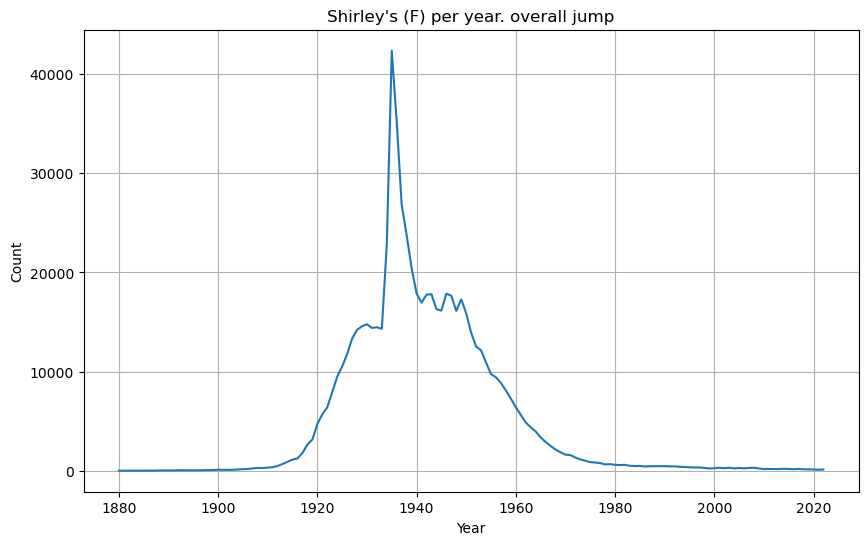

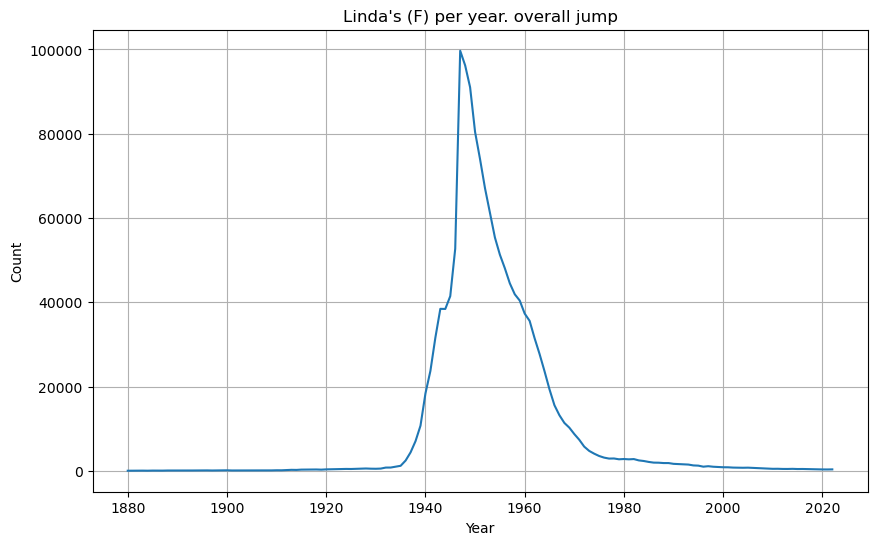

In [24]:
for ind, row in jump_df.iterrows():
    name = row['name']
    sex = row['sex']
    typ = row['type']
    
    # Filter data for the specific name and sex
    filtered_data = national_df[(national_df['name'] == name) & (national_df['sex'] == sex)]
    
    # Plot line chart
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['year'], filtered_data['count'])
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f"{name}'s ({sex}) per year. {typ}")
    plt.grid(True)
    plt.show()

Linda showed up twice in this small sample, 1947 jump and 1950 drop.

https://en.wikipedia.org/wiki/Linda_(1946_song)

https://www.youtube.com/watch?v=Ej2HuRw8dlg

per chatGPT:
"
The popularity of the name Linda in the United States around 1947 and its subsequent decline by 1950 can be attributed to cultural influences, particularly the impact of media and entertainment. In this case, the rise in popularity of the name Linda is often linked to the success of the song "Linda," written by Jack Lawrence. The song was originally penned in 1946 for the daughter of Lawrence's attorney, Lee Eastman, whose daughter was Linda McCartney, later known to be the wife of Paul McCartney of The Beatles. However, the song didn't become widely popular until it was recorded by Buddy Clark in 1947.

The song "Linda" became a massive hit, reaching the top of the charts. This exposure contributed to the name's popularity, as people were influenced by popular culture and the media to name their daughters Linda. It's a common phenomenon for names to rise in popularity due to their association with celebrities, characters in movies, TV shows, books, or songs that capture the public's imagination.

The decline in popularity after 1950 might be attributed to the natural cycle of naming trends, where a name becomes so popular that it starts to feel dated or overly common, prompting parents to look for other names for their newborns. Additionally, as new cultural influences emerge and public attention shifts to other celebrities or media, the names that are associated with those new influences may start to rise in popularity, causing previous favorites to decline.

This pattern of names waxing and waning in popularity based on cultural influences and media exposure is a common trend observed in many societies.
"

### Name Statistics Over Time

In [25]:
#remove years prior to 1937
national_post1937_df = national_df[national_df['year']>1937]

In [26]:
first_known_year = national_post1937_df['year'].min()
last_known_year = national_post1937_df['year'].max()

In [27]:
def calculate_age_data(dataframe, first_known_year, last_known_year):
    """
    Calculate age for each year based on DataFrame and year range.
    
    Parameters:
        Dataframe: DataFrame containing all years of data
        first_known_year: The first year in the dataset
        last_known_year: last year in the dataset
        
    Returns:
        DataFrame: DataFrame containing age data for each year.
    """
    data = pd.DataFrame() #create empyt dataframe

    for year in range(first_known_year, last_known_year+1):
        df = dataframe[dataframe['year'] <= year].copy()
        df = df.sort_values(by='year')
        df['cumsum'] = df.groupby(['name', 'sex'])['count'].cumsum()
        df['sum'] = df.groupby(['name', 'sex'])['count'].transform('sum')
        medians = df[df['cumsum'] >= df['sum']/2].drop_duplicates(subset=['name', 'sex'], keep='first')
        medians['age'] = year - medians['year']
        thisyear = df[df['year'] == year][['name', 'sex', 'count']].rename(columns={'count': 'thisyear_count'})
        df = medians.merge(thisyear, how='left', on=['name', 'sex'])
        df['thisyear_count'] = df['thisyear_count'].fillna(0)
        df = df[['name', 'sex', 'sum', 'age', 'thisyear_count']]
        df['year'] = year
        data = pd.concat([data, df])

    data.reset_index(drop=True, inplace=True)  # Reset index
    
    return data


In [28]:
name='Sarah'
gender = 'F'
color = 'pink'

In [29]:
result_data = calculate_age_data(national_post1937_df[national_post1937_df['name'] == name], first_known_year, last_known_year)

In [30]:
result_data.head(10)

,name,sex,sum,age,thisyear_count,year
0,Sarah,F,3748,0,3748.0,1938
1,Sarah,M,22,0,22.0,1938
2,Sarah,F,7420,1,3672.0,1939
3,Sarah,M,40,1,18.0,1939
4,Sarah,F,11290,1,3870.0,1940
5,Sarah,M,64,1,24.0,1940
6,Sarah,F,15272,1,3982.0,1941
7,Sarah,M,83,1,19.0,1941
8,Sarah,F,19372,2,4100.0,1942
9,Sarah,M,103,2,20.0,1942


In [31]:

chart = alt.Chart(result_data).mark_circle().encode(
    x='age',
    y='thisyear_count',
    size='sum',
    order='year',
    tooltip=['name', 'sex', 'year', 'age', 'thisyear_count', 'sum'],
    color=alt.condition(alt.datum['sex'] == gender, alt.value('#FF69B4'), alt.value(color))  
).properties(
    width=800,
    height=600,
    title= name + ' ' + gender
)

chart = chart.configure_axis(
    labelFontSize=12,
    titleFontSize=12
)

chart


alt.Chart(...)